**import necessary libraries**

In [48]:
import json
import os
import csv

import nltk
import pandas as  pd
import numpy as np
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import classification_report, confusion_matrix


**Dataset exploration**

<Axes: xlabel='category'>

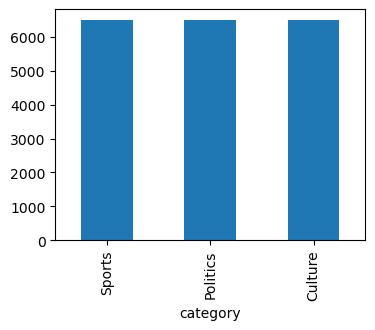

In [7]:
df['category'].value_counts().plot( kind='bar', figsize=(4,3))

In [8]:
df.groupby('category').describe()

article                                                            \
           count unique                                                top   
category                                                                     
Culture     6500   6495  يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...   
Politics    6500   6499  نشرت مجموعة قراصنة الإنترنت أنونيموس الليلة قب...   
Sports      6500   6499  سيفتقد منتخب البيرو في كوبا أمريكا التي تحتضنه...   

               
         freq  
category       
Culture     2  
Politics    2  
Sports      2

**Preprocessing**

In [67]:
# we use this method to enumerate the categoreis
def enumerate_categories(category):
    if category =='Sports':
        return 1
    elif category =='Politics':
        return 2
    elif category =='Culture':
        return 3

In [68]:
# creat new feature that contain the category in number
df['category_id'] = df['category'].apply(enumerate_categories)

In [11]:
df

,article,category,category_id
0,احتفظ بنفيكا بمركز الصدارة بعد فوزه على مضيفه ...,Sports,1
1,كشفت تقارير عن موافقة النجم الفرنسي أنطوان غري...,Sports,1
2,أدلى مدرب فريق برشلونة الاسباني لكرة القدم خوس...,Sports,1
3,أعلن بلد الوليد صاحب المركز التاسع عشر قبل الأ...,Sports,1
4,أعلن ريال مدريد الإسباني بطل أوروبا أمس تمديد ...,Sports,1
...,...,...,...
19495,أكد إسماعيل عبدالله رئيس جمعية المسرحيين والمس...,Culture,3
19496,رفع الشعراء والنقاد المشاركون في فعاليات ملتقى...,Culture,3
19497,أنهت لجنة تحكيم مسابقة شاعر المليون، مقابلات ا...,Culture,3
19498,حوار: نجاة الفارس ولد الشاعر خالد الظنحاني، في...,Culture,3


In [69]:
# start the preprcessing
st = ISRIStemmer()

def preprocess_article(article):
    # hna drna toknization 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(article)
    # hna drna part of speech tagging
    pos = pos_tag(tokens)
    '''# lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos_tag)) for token, pos_tag in pos]'''
    # hna drna stopword removal
    ar_sw = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in stemming(pos) if token not in ar_sw]
    # bind tokens back 
    enhanced_article = ' '.join(filtered_tokens)
    return enhanced_article

def stemming(tags):
    stemed_tokens = []
    for token,tag in tags:
        if tag == 'NNP':
            stemed_tokens.append(token)
        else:
            stem = st.stem(token)
            stemed_tokens.append(stem)
    return stemed_tokens

In [13]:
# applt the preprocessing to our articles
df['article'] = df['article'].apply(preprocess_article)
df.head(3)

,article,category,category_id
0,حفظ بنفيكا بمركز الصدارة فوزه مضيفه ناسيونال ا...,Sports,1
1,كشف تقارير موافقة النجم الفرنسي أنطوان غريزمان...,Sports,1
2,دلى مدرب فريق برشلونة الاسباني لكرة القدم خوسي...,Sports,1


**Train the model**

In [70]:
# split eour data into test and train
X_train, X_test, y_train, y_test = train_test_split(df.article,df.category_id)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
count_vctorizer = CountVectorizer()
X_train_count = count_vctorizer.fit_transform(X_train.values)

In [72]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB() # in our case MultinomialNB() is the suitable classifier 
model.fit(X_train_count,y_train)

MultinomialNB()

**Making Predictions**

In [73]:
def categories_category(category):
    if category == 1:
        return 'Sports'
    elif category == 2:
        return 'Politics'
    elif category == 3:
        return 'Culture'

In [74]:
# method to predict the press article category
def predect_new_category(article, model_name):
    article_count_vctorizer = count_vctorizer.transform(article)
    category = categories_category(model_name.predict(article_count_vctorizer)[0])
    return category

In [75]:
# here we test our model with some articles
article1 = [
    'توج فريق باير ليفركوزن بلقب الدوري الألماني لكرة القدم لأول مرة منذ تأسيسه قبل 120 عاماً، اليوم الأحد، بعد الفوز على ضيفه فيردر بريمن بنتيجة 5-0، ضمن منافسات الجولة الـ29 من المسابقة. وحسم ليفركوزن اللقب التاريخي لصالحه قبل 5 جولات من انتهاء المسابقة، منهيا هيمنة بايرن ميونيخ على البوندسليغا التي امتدت 11 موسما. وفرض البديل فلوريان فيرتس نفسه نجما للقاء بتسجيله ثلاثية "هاتريك" (68 و83 و90)، بعدما افتتح النيجيري فيكتور بونيفايس التسجيل (25 من ركلة جزاء)، وأضاف السويسري غرانيت تشاكا الثاني (60). وتقدم ليفركوزن الذي رفع رصيده إلى 79 نقطة في المركز الأول بفارق 16 نقطة عن وصيفيه بايرن ميونخ وشتوتغارت الثالث (63 نقطة لكل منهما) قبل 5 جولات من النهاية، واضعا حدا لهيمنة عملاق بافاريا على اللقب بين عامي 2013 و2023.'
]
article2 = [
    'شكّل الهجوم الإيراني غير المسبوق على إسرائيل باستخدام مئات المسيّرات، والصواريخ، الليلة قبل الماضية ذروة أسبوعين من التوتر بذلت خلالهما واشنطن جهودا كبيرة لمنع تدهور الوضع في المنطقة. وأعلنت القيادة العسكرية الأميركية الوسطى (سنتكوم)، أمس الأحد، أن الولايات المتحدة، وبدعم من مدمرات أوروبية، تمكنت من تدمير "أكثر من 80″ مسيّرة و6 صواريخ باليستية على الأقل مخصصة لضرب إسرائيل انطلاقا من إيران واليمن خلال الهجوم الإيراني". ووفقا لمسؤول عسكري أميركي، انطلق من إيران نحو 100 صاروخ باليستي متوسط المدى، وأكثر من 30 صاروخ كروز، وما لا يقل عن 150 مسيّرة هجومية استهدفت إسرائيل، كما أحصى الجيش الإسرائيلي من جهته أكثر من 350 مقذوفا، وقال إن 99% منها دمر. ودمرت سفينتان أميركيتان موجودتان في المنطقة، هما "يو إس إس أرلي بيرك" و"يو إس إس كارني"، 6 صواريخ، قبل أن تتدخل طائرات، وتدمر بدورها أكثر من 70 مسيّرة إيرانية. وأسقطت بطارية صواريخ باتريوت صاروخ كروز في مكان ليس بعيدا عن مدينة أربيل العراقية في كردستان العراق. ودمّرت القوات الأميركية أيضا "صاروخا باليستيا على مركبة الإطلاق، كما دمرت 7 مسيّرات على الأرض قبل إطلاقها في مناطق باليمن تسيطر عليها جماعة الحوثيين المدعومة من إيران"، وفق سنتكوم.'
]
print(f'category of first article is: {predect_new_category(article1, model)}')
print(f'category of second article is: {predect_new_category(article2, model)}')

category of first article is: Sports
category of second article is: Politics


In [76]:
# save our dataframe in a csv file in case if we need to work with it in future
df.to_csv('enhanced_articles.csv', index=False)

**Evaluating Performance**

In [26]:
X_test[:5]

6117     اكد المدافع الفنزويلي أوزوالدو فيزكاروندو منتخ...
7075     لغة جديدة تعهدها ساحة الدبلوماسية الفلسطينية و...
15993    تعن كلمة ترجمة الإيضاح والتفسير لكل جم وأستغرب...
15052    يقم 40 طالبا وطالبة كلية الفنون الجميلة والتصم...
16765    فتح الشيخ محمد بن نهيان بن مبارك آل نهيان امس ...
Name: article, dtype: object

In [78]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vctorizer.transform(X_test)
pred = model.predict(X_test_counts)

acc = accuracy_score(y_test, pred)
print("accuracy:", acc) # accuracy ostoriya ^_^

accuracy: 0.9905641025641025


**save and load the model**

In [51]:
import joblib

In [43]:
joblib.dump(model,'press_articles_classifier')

['press_articles_classifier']

In [52]:
my_model= joblib.load('press_articles_classifier')

In [63]:
article3 = [
    'اختارت جامعة الجزائر "2" بالتنسيق مع التنظيمات الطلابية الناشطة في الجامعة، الاحتفال بيوم العلم بتحضير برنامج ثري جمع بين الأنشطة العلمية، ممثلة في عدد من المحاضرات التي تمحورت في مضمونها حول تمجيد يوم العلم المصادف لـ16 أفريل، وكذا أنشطة ثقافية ممثلة في أبيات شعرية وأخرى فنية رياضية تفاعل معها الطلبة الذين توافدوا على قاعة المحاضرات الكبرى للمشاركة في الاحتفالية. بدأت الاحتفالية بكلمة ترحيبية لرئيس الجامعة عبد الحميد خميسي، الذي تطرق من خلالها إلى أهمية العلم في بناء الأمم، وكيف يمكن له أن يكون سلاح ذو حديين فقد يكون وسيلة لإنقاذ البشرية وتحديدا في مجال معالجة الأمراض الخطيرة، كما يمكن له أن يتحول إلى وسيلة لتحطيم الإنسان وتدمير الشعوب، ودعا في الإطار الطلبة إلى الاهتمام بتعلم مختلف العلوم والانفتاح على العالم الخارجي.'
]
predect_new_category(article3, my_model)

'Culture'